# Linear Regression - some Theory

2. Speficy loss function
2. Write down log Likelihood function
3. Minimize + get Normal equation

### Approach 1: Non-probabilisitc using loss function
The easies approach to linear regression is to use the squared loss function, 
$$l = \sum_{i=1}^N (y_i - \hat y_i)^2,$$
where $\hat y_i$ is the predicted value and $y_i$ is the true value of sample $i$. Together with a linear, non probabilistic model for the. For feature vector $x_i$ (where the first component is per convention the constant one -aka known as intercept) the prediction is given by the linear model. In scalar product notation:
$$y_i =  x_i^T \theta,$$
with coefficient vector $\theta$. Rewriting this in Matrix notation to account for all sampels we get for the loss together with the linear model:
$$l = (Y - X\theta)^T (Y - X\theta)$$
Now we would like to find $\theta^*$ that _minimizes_ the loss. 
Setting the derivative w.r.t. $\theta$ of the loss function zero  gives the normal equation 
$$X^T(Y - X\theta) = 0.$$
If $X^T X$ is non-singular (this is the case when there are more traning examples than features because then $X^T X$ is positive definite) allows for finding the unique solutions of the normal equation, 

$$\theta ^* =  \left( X^T X  \right)^{-1} X^T Y$$

Note that this approach is non-probabilistic and thus, does not explicitly account for uncertainty  (as a probability distributions) in the data and coefficients.
### Approach 2: Probabilistic  +  generative approach using max likelihood
This approach introduces a probability distribution but does not explicitly consider a loss function. The  response is modelled  via a Normal distribution ("Gauss error") assuming constant standard deviation
$$y_i = x_i^T \theta + \epsilon := \mathcal N (x_i^T \theta, \sigma^2)$$
In other words, the conditional distribtion  $p(y \mid x, \theta, \sigma^2)$ is given by a Normal distribtion.
The likelihood function is just the pdf of __all__ datapoints assuming i.i.d (this assumption in fact leads to the factorization), 
$$\mathcal L = \Pi_{i=1}^N p(y_i \mid x, \theta, \sigma).$$
As we are aiming to optimize $\theta$ in a way, a striclty monotonic transformation is applied on the likelihood function. It leaves the optimum invariant. The standard procedure is thus to consider the the logarithm ot likelihood function:
$$\mathcal L_l = \sum_{i=1}^N \log p(y_i \mid x, \theta, \sigma).$$
Evaluating this expression for the Normal distribution gives
$$\mathcal L_l =  - \frac{1}{2\sigma^2}\sum_{i=1}^N (y_i - x_i^T \theta)^2  - \frac{N}{2}log(2\pi\sigma^2) $$
Now, we would like to _maximise_ the likelihood and thus the log likelihood with respect to $\theta$. This is equivalent to _minimizing_ the negative of it. Throwing away terms that, don't depend on $\theta$ gives the function for which we would like to find the minimizer. That is we want to solve this expression, 
$$\text{argmin}_\theta\left( Y - X \theta \right )^T \left( Y - X \theta \right ),$$
where we have rewritten the sum of squares over all training data again in Matrix notation. But this is exactly the same problem as in approach one and this gives the same solution (under the same circumstances), 

$$\theta ^* =  \left( X^T X  \right)^{-1} X^T Y$$

**Remarks**
* Note that this procedure only puts a probablilty distribution on the response $y$ while treating the remaining ingredients as variables (via the conditional pdf Ansatz). 
* This already implies that in this context the solutions $\theta^*$ just tell how the pdf is parametrized (not even completely as we did not consider the optimum value of $\sigma$).
* In either case this approach does not really tell us how to predict a specific value $y$ for a given $x$. It just tells us the corresponding distribution of $y$. The fundamental reason is that we did not make any use of a loss function in this approach. 
* Pragmatically and in practice  of course, the prediction is made by plugging into the linear model as e.g. in the first appraoch
* Note that a constant value for $\sigma$ is called homoscedasticity. This implies that the variance does may not be a function of the features but only the mean within the Normal model for the response.
* Furhtermore note that this approach does not consider uncertainties in the paramters. This would eventually require a Bayesian approach. 


### Apporach 4: Uncorrelated Bayesian Approach
A Bayesian linar regression is a straightforward generalization, 
#### The model:
$$y_i = x_i^T \theta + \epsilon \propto \mathcal N (y_i  | x_i^T \theta, \sigma^2)\\ 
p(\theta)  \propto \mathcal N (\theta | 0, \lambda ^{-1} \mathbb 1 ) 
$$

* This model takes as input parameters $\lambda$ and $\sigma^2$.
* The prio of $\theta$ is a Normal distribution parametrized by the parameters $\lambda$
* This lends also the model its name as the prior is uncorrelated (i.e., diagonal $\Sigma$ Matrix)
* **Todo: in order to make contact with the non-baysian formulations above we need to $X \rightarrow X^T$**

#### Learning
*  Learning corresponds to determining the posterior probability distribution of $\theta$: 
$$\mathcal N \left(\theta ~ |~ \left(X^TX + \lambda \sigma^2 \mathbb 1\right)X^TY, \left( \lambda \mathbb 1 + \frac{1}{\sigma^2} X^TX\right)^{-1} \right)$$
in other words posterior of $\theta$ follows a normal distribution with 
- **mean**
$$\left(X^TX + \lambda \sigma^2 \mathbb 1\right)X^TY$$
- **standard deviation**
$$\left( \lambda \mathbb 1 + \frac{1}{\sigma^2} X^TX\right)^{-1}$$
* Note the feature correlation term the makes the posterior correlated!

#### Inference
* Corresponds to predicting a new value $y^*$ for a new $x ^*$
$$p(y^* ~|~ x^* \sigma^2 \lambda, \mathcal D) = 
\mathcal N \left( y^* ~|~ w^Tx^*, ~  \sigma^2  + x^*\left(\lambda \mathbb1 + \frac{1}{\sigma^2} XX^T\right)^{-1}x^{*T}\right)$$

#### Ridge Regression as limiting case
* Learning
* $\lambda \sigma ^2 \rightarrow \lambda$ (regularization parameter)
* $\langle p(\theta ~|~ \mathcal D, \lambda, \sigma^2) \rangle = \left(XX^T + \lambda \mathbb 1 \right)XY$ Estimator of ridge regression
* Prediction
* $\langle p(y^* ~|~ x^* \sigma^2 \lambda, \mathcal D)\rangle = w^T x^*$ (= Ridge Regression prediction)



### Remarks
References:
- https://brendanhasz.github.io/2018/12/03/tfp-regression
- https://www.youtube.com/watch?v=Nr6jyodaFDo
- https://stackoverflow.com/questions/59371283/bayesian-linear-regression-with-tensorflow-probability
Approaches: 
- Via max likelihood https://www.quantstart.com/articles/Maximum-Likelihood-Estimation-for-Linear-Regression
- Minimize quadratic error directly

- Tensorflow probablilty introduction: 

https://github.com/tensorflow/probability/blob/master/tensorflow_probability/examples/jupyter_notebooks/TensorFlow_Probability_Case_Study_Covariance_Estimation.ipynb

https://github.com/tensorflow/probability/blob/master/tensorflow_probability/examples/jupyter_notebooks/Generalized_Linear_Models.ipynb

# Observations
* Heavily dependent on the modelparameters $\lambda, \sigma^2$
* Which are determined by hand

# Get the data

In [6]:
import numpy as np
import tensorflow as tf
N = 100 #number of datapoints to generate
D = 1   #number of dimensions
STD = 1
theta = tf.random.normal(shape=[D, 1], stddev=1)
print("Theta:", theta.numpy())
x = tf.random.normal(shape=[N, D])
y = tf.random.normal(shape=[N, 1], mean=tf.matmul(x, theta), stddev=STD)
print("Std:", STD)

# Make a TensorFlow Dataset from training data
data_train = tf.data.Dataset.from_tensor_slices((x, y)).shuffle(10000).batch(N)

Theta: [[0.34323436]]
Std: 1


# Analytical solution

In [10]:
def fit_theta_parameters(x, s_square, l):
    inv_sigma  = l * tf.eye(x.shape[1])  +  tf.matmul(x, x, True) / s_square
    sigma = tf.linalg.inv(inv_sigma)
    mu = s_square * tf.matmul(sigma,  tf.matmul(x, y, transpose_a=True))
    return mu, sigma

def draw_from_theta_posterior(mu, std, n_samples):
    """Todo: Take Multinormal"""
    return tf.random.normal(shape=[n_samples], mean=mu, stddev=std)

In [11]:
from tensorflow_core.data import Dataset as tfds
from tensorflow_probability import distributions as tfd
from matplotlib import pyplot as plt

def plot(ds: tfds, mu, std): 
    assert D == 1, "this plot assumes one feature only"
    fig, ax = plt.subplots(nrows=2, figsize=(15,8))
    iterator = iter(ds)
    data = next(iterator) # todo iterate correctly
    ax[0].plot(data[0], data[1], "o", color="red", alpha=.5)
    xs = tf.linspace(min(data[0])[0], max(data[0])[0], 100)
    ax[0].plot(xs, tf.reshape(mu * xs, [-1]), "--", color="k", lw=1, label=r"$\langle\theta\rangle$")
    ax[0].grid()
    ax[0].set_ylabel("y", fontsize=12)
    ax[0].set_xlabel("x", fontsize=12)
    
    ax[1].set_ylabel(r"$p(\theta)$", fontsize=12)
    ax[1].set_xlabel(r"$\theta$", fontsize=12)
    factor = 5
    xs = tf.linspace((mu - factor * std)[0, 0], (mu + factor * std)[0, 0], 300)
    dist = tfd.Normal(loc=mu, scale=std)
    ys = dist.prob(xs)
    ax[1].plot(xs, tf.reshape(ys, [-1]), color="red", alpha=.5)
    #ax[1].grid()
    ax[1].set_yticks([])
    ax[0].legend()

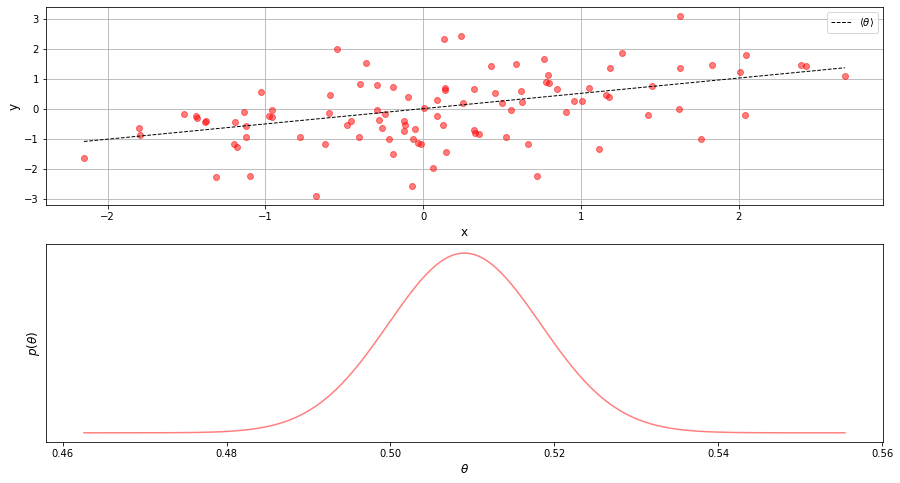

In [20]:
mu, std = fit_theta_parameters(x, 1, 0.0001)
#samples = draw_from_theta_posterior(mu, std, 10000)
#tf.reduce_mean(samples, axis=1)

plot(data_train, mu, std)

# Neural Network with Tensorflow / Keras 

In [21]:
import tensorflow_probability as tfp
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
    """Regularization via kernel and bias regularizer"""
    model = keras.Sequential([
        layers.Dense(1, activation='linear' ,input_shape=[D]), 
        tfp.layers.DistributionLambda(lambda t: tfd.Normal(loc=[..., t], scale=1)) 
    ])
    
    model.compile()
    return model

model = build_model()
model.summary()

TypeError: in converted code:

    /home/viktor/.local/lib/python3.6/site-packages/tensorflow_probability/python/layers/distribution_layer.py:251 call
        inputs, *args, **kwargs)
    /home/viktor/.local/lib/python3.6/site-packages/tensorflow_core/python/keras/layers/core.py:846 call
        result = self.function(inputs, **kwargs)
    /home/viktor/.local/lib/python3.6/site-packages/tensorflow_probability/python/layers/distribution_layer.py:171 _fn
        d = make_distribution_fn(*fargs, **fkwargs)
    <ipython-input-21-a15f92ca77c1>:9 <lambda>
        tfp.layers.DistributionLambda(lambda t: tfd.Normal(loc=[..., t], scale=1))
    </home/viktor/.local/lib/python3.6/site-packages/decorator.py:decorator-gen-239>:2 __init__
        
    /home/viktor/.local/lib/python3.6/site-packages/tensorflow_probability/python/distributions/distribution.py:284 wrapped_init
        default_init(self_, *args, **kwargs)
    /home/viktor/.local/lib/python3.6/site-packages/tensorflow_probability/python/distributions/normal.py:138 __init__
        loc, dtype=dtype, name='loc')
    /home/viktor/.local/lib/python3.6/site-packages/tensorflow_probability/python/internal/tensor_util.py:115 convert_nonref_to_tensor
        value, dtype=dtype, dtype_hint=dtype_hint, name=name)
    /home/viktor/.local/lib/python3.6/site-packages/tensorflow_core/python/framework/ops.py:1256 convert_to_tensor_v2
        as_ref=False)
    /home/viktor/.local/lib/python3.6/site-packages/tensorflow_core/python/framework/ops.py:1314 convert_to_tensor
        ret = conversion_func(value, dtype=dtype, name=name, as_ref=as_ref)
    /home/viktor/.local/lib/python3.6/site-packages/tensorflow_core/python/ops/array_ops.py:1368 _autopacking_conversion_function
        return _autopacking_helper(v, dtype, name or "packed")
    /home/viktor/.local/lib/python3.6/site-packages/tensorflow_core/python/ops/array_ops.py:1303 _autopacking_helper
        constant_op.constant(elem, dtype=dtype, name=str(i)))
    /home/viktor/.local/lib/python3.6/site-packages/tensorflow_core/python/framework/constant_op.py:258 constant
        allow_broadcast=True)
    /home/viktor/.local/lib/python3.6/site-packages/tensorflow_core/python/framework/constant_op.py:296 _constant_impl
        allow_broadcast=allow_broadcast))
    /home/viktor/.local/lib/python3.6/site-packages/tensorflow_core/python/framework/tensor_util.py:451 make_tensor_proto
        _AssertCompatible(values, dtype)
    /home/viktor/.local/lib/python3.6/site-packages/tensorflow_core/python/framework/tensor_util.py:331 _AssertCompatible
        (dtype.name, repr(mismatch), type(mismatch).__name__))

    TypeError: Expected float32, got Ellipsis of type 'ellipsis' instead.


# Using the estimator API
* within the estimator API the number of training steps is controlled via the the `dataset`
* more precisely via the `repeat` keyword

# Sklearn 

# Comparision of results